In [1]:
import numpy as np
import pandas as pd

In [8]:
a = np.array([1,2,3])

In [9]:
s = pd.Series([1,2,3])

In [22]:
s.index = ['민형','신희', '소라']

In [34]:
s = pd.Series({'소라':[100,100],'소라':100,'소라':[100,50]})

In [27]:
s.index = ['소라','소라','소라',]

In [31]:
s.mean()

50.0

In [37]:
s.values

array([list([100, 50])], dtype=object)

In [40]:
dic  = {'a':1,'b':2,'c':3}
pd.Series(dic)
pd.Series([1,2,3],index= [i for i in 'abc'])

a    1
b    2
c    3
dtype: int64

In [41]:
list_data = ['2019-01-02',3.14,' ABC',100,True]
sr = pd.Series(list_data)
sr

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object

In [45]:
sr.index = np.arange(1,6)

In [52]:
sr.index = ['동연','민형','혜림','신희','소라']

In [57]:
sr[['동연','혜림']]
sr['동연':'신희']

동연    2019-01-02
민형          3.14
혜림           ABC
신희           100
dtype: object

In [65]:
tup_data = ('영인','2010-05-01','여',True)
ar1 = pd.Series(tup_data,index=['이름','생년월일','성별','학생여부'])
print(ar1)
## dictionary이용
dic = {'이름':'영인','생년월일':'2010-05-01','성별':'여','학생여부':True}
ar2 = pd.Series(dic)
print("=============================")
print(ar2)
pd.Series(dict(zip(ar2.index,ar2.values)))
ar2.to_dict()

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object
이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object


{'이름': '영인', '생년월일': '2010-05-01', '성별': '여', '학생여부': True}

In [66]:
pd.Series(ar1.to_dict())

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object

In [67]:
dir(ar1)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [68]:
ar1.생년월일

'2010-05-01'

In [69]:
ar1['age'] = 30

In [71]:
ar1.age

30

In [72]:
arr = np.random.randint(1,100,30)
sr = pd.Series(arr,index = np.random.choice(['a','b','c'],30))

In [81]:
sr.var()
sr.std()
sr.describe()['25%']

31.0

In [83]:
np.percentile(sr.values,25)

31.0

In [87]:
np.random.seed(100)
arr = np.random.randint(60,101,30)
score = pd.Series(arr)
score.index = np.random.choice(['태우','광우','영훈'],30)

In [91]:
pd.Series(score.index).value_counts()

영훈    12
광우    11
태우     7
Name: count, dtype: int64

In [97]:
#태우,광우,영훈 세분의 평균
score['태우'].max()
score['광우'].max()
score['영훈'].max()

96

In [101]:
dic = {}
for cat in score.index.unique():
    dic[cat] = score[cat].mean()
score_mean = pd.Series(dic)
score_mean

광우    80.818182
영훈    77.166667
태우    81.428571
dtype: float64

In [110]:
score.groupby(level=0).count()

광우    11
영훈    12
태우     7
dtype: int64

In [111]:
pd.Series(score.index).value_counts()

영훈    12
광우    11
태우     7
Name: count, dtype: int64

In [125]:
def mean(x):
    return x.mean()
def max(x):
    return x.max()
def sum(x):
    return x.sum()
def min(x):
    return x.min()
def median(x):
    return x.median()
def quarter1(x):
    return np.percentile(x,25)
def quarter2(x):
    return np.percentile(x,75)
                         
def group_by(x,method):
    method_dict = {
        'mean':mean,
        'max':max,
        'sum':sum,
        'min':min,
        'median':median,
        '25%':quarter1,
        '75%':quarter2
    }
    dic = {}
    for cat in x.index.unique():
        dic[cat] = method_dict[method](x[cat])
    x = pd.Series(dic)
    return x

In [129]:
group_by(score,'75%')

광우    90.50
영훈    88.75
태우    88.00
dtype: float64

In [127]:
# group_by(score,'mean',max,sum,min,median,25%,75%)
score.groupby(level=0).median()

광우    84.0
영훈    75.0
태우    83.0
dtype: float64

In [130]:
group_by(score,'mean')

광우    80.818182
영훈    77.166667
태우    81.428571
dtype: float64

In [136]:
# column 추가 
df = pd.DataFrame(np.random.randint(60,101,size=(100,4)))
df.index = np.arange(1,101)
df.columns = ['kor','eng','math','sci']

In [145]:
dic = {
    'kor':np.random.randint(60,101,100),
     'eng':np.random.randint(60,101,100),
     'math':np.random.randint(60,101,100),
     'sci':np.random.randint(60,101,100),
}
df1 = pd.DataFrame(dic,index=np.arange(1,101))

In [154]:
df.to_dict().get('eng').get(20)

91

In [156]:
###  원소를 3개씩 담고 있는 리스트를 다섯개 만들고 각 리스트에 딕셔너리의  키는 c0~c4
dic = {
    'c0':[1,2,3],
    'c1':[1,2,3],
    'c2':[1,2,3],
    'c3':[1,2,3],
    'c4':[1,2,3],
}
pd.DataFrame(dic)

,c0,c1,c2,c3,c4
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3


In [170]:
df = pd.DataFrame(np.ones((3,5),dtype=np.int_)*np.array([1,2,3]).reshape(-1,1))
df.columns = ['c'+str(i) for i in range(5)]
df.columns = ['a']*5
df.index = np.arange(1,4)

In [177]:
df.columns = ['c '+str(i) for i in range(5)]

In [176]:
df.c0

1    1
2    2
3    3
Name: c0, dtype: int32

In [180]:
df['c 0']

1    1
2    2
3    3
Name: c 0, dtype: int32

In [182]:
df.columns = ['c' +str(i) for i in range(5)]

In [184]:
df.columns = ['d' +str(i) for i in range(5)]

In [196]:
df.columns = np.hstack([df.columns[:4],['e4']])

In [200]:
df.rename(columns={'d2':'f2'},inplace=True)
df

,d0,d1,f2,d3,e4
1,1,1,1,1,1
2,2,2,2,2,2
3,3,3,3,3,3


In [195]:
np.hstack([df.columns[:4],['e4']])

array(['d0', 'd1', 'd2', 'd3', 'e4'], dtype=object)

In [192]:
df.columns[:4]

Index(['d0', 'd1', 'd2', 'd3'], dtype='object')

In [201]:
df = pd.DataFrame(np.random.randint(1,10,(5,11)))

In [203]:
df.columns = ['col '+str(i) for i in range(11)]

In [208]:
df.rename(columns={'col_1':'col_0'},inplace=True)

In [224]:
df.rename(columns={ i:i.replace(' ', '_') for i in df.columns  if ' ' in i },inplace=True)

In [222]:
'col 1'.replace(' ','_')

'col_1'

In [228]:
df = pd.DataFrame(df.values)
df = pd.DataFrame(np.random.randint(60,101,(100,4)))
df.columns = ['Korean','Enlgish','Mathmatic','Science']

In [238]:
df.columns.str.lower().str.slice(0,3)

Index(['kor', 'enl', 'mat', 'sci'], dtype='object')

In [239]:
dict(zip(df.columns,df.columns.str.lower().str.slice(0,3)))

{'Korean': 'kor', 'Enlgish': 'enl', 'Mathmatic': 'mat', 'Science': 'sci'}

In [241]:
df.rename(columns=dict(zip(df.columns,df.columns.str.lower().str.slice(0,3))),inplace=True)

In [242]:
df

,kor,enl,mat,sci
0,73,84,83,77
1,67,72,76,79
2,71,69,74,60
3,85,96,91,98
4,61,63,92,98
...,...,...,...,...
95,67,81,65,87
96,98,84,72,74
97,90,99,76,62
98,83,78,82,83


In [250]:
df.columns[df.columns != 'mat']

Index(['kor', 'enl'], dtype='object')

In [252]:
df1 = df[['kor','enl','mat']]
df2 = df.drop(['sci'],axis=1)
# df.drop(['sci'],axis=1,inplace=True)

KeyError: "['sci'] not found in axis"

In [255]:
df.drop([96],axis=0,inplace=True)

In [260]:
df = pd.DataFrame(np.random.randint(60,101,(30,4)),columns=['k','e','m','s'])
df.index = np.random.choice(['시형','태우','소라'],30)

In [264]:
df.drop(['태우','소라'],axis=0)

,k,e,m,s
시형,85,74,82,80
시형,68,64,91,97
시형,91,72,98,69
시형,67,90,79,60
시형,87,66,63,85
시형,69,99,79,65
시형,89,65,70,68
시형,78,82,83,85
시형,97,66,89,96
시형,84,100,95,60


In [266]:
df.loc['태우','k']

태우    84
태우    98
태우    66
태우    60
태우    83
태우    68
태우    93
태우    66
태우    60
Name: k, dtype: int32

In [268]:
df = pd.DataFrame(np.random.randint(60,101,(100,3)))


In [269]:
df.columns = ['kor','eng','math']

In [272]:
df.drop(0,axis=0,inplace=True)

In [283]:
df.iloc[0,:]

kor     93
eng     99
math    69
Name: 1, dtype: int32

In [285]:
df.loc[1,:'math']

kor     93
eng     99
math    69
Name: 1, dtype: int32

In [294]:
df.kor > df.kor.mean()

1      True
2     False
3     False
4     False
5     False
      ...  
95    False
96     True
97    False
98    False
99    False
Name: kor, Length: 99, dtype: bool

In [298]:
# 국어 성적이 국어성적 평균보다 큰 값
df.loc[df.kor > df.kor.mean(),:]
df.iloc[np.array((df.kor > df.kor.mean())),:]

,kor,eng,math
1,93,99,69
6,97,89,67
7,95,78,78
8,88,63,70
11,87,64,97
12,81,81,99
13,88,73,75
16,82,63,84
17,88,63,86
19,95,81,98


In [302]:
df.loc[df.kor>df.kor.mean(),[True,False,True]]
df.iloc[(df.kor>df.kor.mean()).values,[True,False,True]]

,kor,math
1,93,69
6,97,67
7,95,78
8,88,70
11,87,97
12,81,99
13,88,75
16,82,84
17,88,86
19,95,98


In [326]:
np.random.seed(100)
df = pd.DataFrame(np.random.randint(60,101,(100,4)))

In [327]:
df.columns = ['c1','c2','c3','c4']

In [307]:
df['y'] = np.random.choice([0,1,2],100) 

In [309]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [313]:
df.drop(['y'],axis=1,inplace=True)

In [325]:
# 전체 평균 보다 못한 사람 제외
df.loc[df.mean(1) >= df.mean(1).mean(),:]

,c1,c2,c3,c4
0,91,92,93,64
1,65,92,80,91
3,69,98,72,98
4,95,93,84,80
5,79,69,94,100
6,70,82,96,95
8,86,86,96,62
9,66,97,94,89
10,81,98,76,86
11,84,85,77,76


In [321]:
df.values.mean()

79.81

In [339]:
# 1 iloc사용 2 loc사용
# c2 과목의 중간값 보다 c2 과목의 성적이 큰 사람들의  c3과목의 평균
df.loc[df.c2 > df.c2.median(),'c3'].mean()
df.iloc[(df.c2 > df.c2.median()).values,np.where(df.columns == 'c3')[0]].mean()

c3    79.854167
dtype: float64

In [355]:
## 과목중 평균이 가장 높은 과목
df.columns[max(df.mean(0)) == df.mean(0)][0]
df.mean(0).argsort().head(1).index[0]

'c1'

In [359]:
np.random.seed(100)
df = pd.DataFrame(np.random.choice([0,1],(1000,8)))

In [366]:
## 1 여성호르몬,  0 남성 호르몬 여성호르몬이 짝수면  여성 그렇지 않으면 남성
## 여성의 총 호르몬의 개수
df.loc[df.sum(1) % 2 == 0,:].sum().sum()
df.iloc[(df.sum(1) % 2 == 0).values,:].sum().sum()

1930

In [371]:
df[0]
df.iloc[:,0]
df.loc[:,0]
df.rename(columns={0:'c0'},inplace=True)

In [372]:
df.c0

0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    1
Name: c0, Length: 1000, dtype: int32

In [377]:
df[8] = np.ones(1000,dtype=np.int_)

In [378]:
df

,c0,1,2,3,4,5,6,7,8
0,0,0,1,1,1,1,0,0,1
1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1
3,0,1,1,1,0,0,1,0,1
4,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,1,0,1,1,1
996,1,0,0,0,1,1,0,1,1
997,0,0,0,0,1,1,1,0,1
998,0,1,0,1,0,1,0,1,1


In [380]:
df.loc[1000] = 1

In [381]:
df

,c0,1,2,3,4,5,6,7,8
0,0,0,1,1,1,1,0,0,1
1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1
3,0,1,1,1,0,0,1,0,1
4,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
996,1,0,0,0,1,1,0,1,1
997,0,0,0,0,1,1,1,0,1
998,0,1,0,1,0,1,0,1,1
999,1,1,1,0,1,0,0,0,1


In [383]:
df.loc[1001] = [1,1,1,0,0,1,0,1,0]

In [384]:
df

,c0,1,2,3,4,5,6,7,8
0,0,0,1,1,1,1,0,0,1
1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1
3,0,1,1,1,0,0,1,0,1
4,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
997,0,0,0,0,1,1,1,0,1
998,0,1,0,1,0,1,0,1,1
999,1,1,1,0,1,0,0,0,1
1000,1,1,1,1,1,1,1,1,1


In [385]:
df.loc[1003] = 1

In [386]:
df

,c0,1,2,3,4,5,6,7,8
0,0,0,1,1,1,1,0,0,1
1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1
3,0,1,1,1,0,0,1,0,1
4,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
998,0,1,0,1,0,1,0,1,1
999,1,1,1,0,1,0,0,0,1
1000,1,1,1,1,1,1,1,1,1
1001,1,1,1,0,0,1,0,1,0


In [391]:
df.iloc[0,0] = 10
df.loc[0,1:3] = 10
df.iloc[1,1:4] = 10
df.drop(index=[3],inplace=True)

In [395]:
df.loc[2:5,1:4] = 0

In [400]:
df.iloc[2:5,1:5] = 10
df

,c0,1,2,3,4,5,6,7,8
0,10,10,10,10,1,1,0,0,1
1,0,10,10,10,0,0,0,0,1
2,1,10,10,10,10,1,0,0,1
4,0,10,10,10,10,1,0,0,1
5,1,10,10,10,10,1,1,1,1
...,...,...,...,...,...,...,...,...,...
998,0,1,0,1,0,1,0,1,1
999,1,1,1,0,1,0,0,0,1
1000,1,1,1,1,1,1,1,1,1
1001,1,1,1,0,0,1,0,1,0


In [401]:
df = pd.DataFrame(np.arange(12).reshape(3,4))
df.columns = ['kor','eng','math','sci']
df.index = ['광우','태우', '시형']

In [403]:
df['total'] = df.sum(1)

In [409]:
df.transpose()

,광우,태우,시형
kor,0,4,8
eng,1,5,9
math,2,6,10
sci,3,7,11
total,6,22,38


In [424]:
np.random.seed(100)
df = pd.DataFrame(np.random.randint(5,100,(365,3)))

In [425]:
df.columns = ['태우','영훈','광우']

In [426]:
df['sales_date'] = np.datetime64('2023-08-05') + np.arange(365)

In [427]:
df = df[['sales_date','태우','영훈','광우']]

In [ ]:
2023-08

In [455]:
## 현재까지 가장많이 판 사람은?
df[['태우','영훈','광우']].sum(0).argmin()
df[['태우','영훈','광우']].sum(0).index[df[['태우','영훈','광우']].sum(0).argmin()]
## 2023년도 8월에 가장 많이 판 사람은?
new_data = df.loc[df.sales_date.astype('str').str.slice(0,7) == '2023-08',["태우","영훈","광우"]].sum(0)

In [471]:
new_data.reset_index().loc[new_data.argmax(),'index']
new_data.index[new_data.argmax()]
df.loc[df.sales_date.astype('str').str.slice(0,7) == '2023-08',['태우','영훈','광우']].sum(0).index[df.loc[df.sales_date.astype('str').str.slice(0,7) == '2023-08',['태우','영훈','광우']].sum(0).argmin()]

'광우'

In [473]:
df['sales_month'] = df.sales_date.astype('str').str[0:7]

In [475]:
## 월별 가장 많이 판 사람 
df_month_sales = pd.DataFrame(columns=['sales_month','best_seller'])
df_month_sales

,sales_month,best_seller


In [493]:
df_month_sales
#pd.DataFrame(tmp_dic)

,sales_month,best_seller


In [495]:
man_list = []
for idx, val in enumerate(df.sales_month.unique()):
    man = df.iloc[(df.sales_month==val).values,[1,2,3]].sum(0).index[df.iloc[(df.sales_month==val).values,[1,2,3]].sum(0).argmax()]
    man_list.append(man)
df_sales_month = pd.DataFrame()
df_sales_month['sales_month'] = df.sales_month.unique()
df_sales_month['best_seller'] = man_list

In [503]:
# 각 월별 가장 많이 판 사람을 우승자라 할때 제일 많은 우승은?
x, y = np.unique(df_sales_month.best_seller,return_counts=True)
x[np.argmax(y)]

'태우'

In [507]:
df.set_index('sales_date',inplace=True)

In [513]:
df.reset_index(inplace=True)
df

,sales_date,태우,영훈,광우,sales_month
0,2023-08-05,13,29,72,2023-08
1,2023-08-06,92,84,53,2023-08
2,2023-08-07,15,99,57,2023-08
3,2023-08-08,58,71,19,2023-08
4,2023-08-09,39,29,20,2023-08
...,...,...,...,...,...
360,2024-07-30,20,85,25,2024-07
361,2024-07-31,60,87,67,2024-07
362,2024-08-01,74,33,33,2024-08
363,2024-08-02,43,83,41,2024-08


In [516]:
df['new_date'] = np.random.choice(df.sales_date,365,replace=False)

In [518]:
df.set_index('new_date',inplace=True)

In [521]:
df.drop(columns=['sales_date'],inplace=True)

In [523]:
df.reset_index(inplace=True)

In [529]:
df = df.set_index('new_date').sort_index().reset_index()

In [530]:
df

,new_date,태우,영훈,광우,sales_month
0,2023-08-05,13,78,26,2024-07
1,2023-08-06,12,99,7,2023-10
2,2023-08-07,18,80,54,2023-12
3,2023-08-08,65,85,74,2023-11
4,2023-08-09,11,42,63,2023-09
...,...,...,...,...,...
360,2024-07-30,97,49,62,2023-09
361,2024-07-31,30,66,85,2024-04
362,2024-08-01,58,32,61,2023-08
363,2024-08-02,10,51,73,2024-07


In [538]:
arr1 = np.arange(3) 
arr2 = np.arange(100)

In [541]:
pd.Series(arr1,index=[100,101,102]) + pd.Series(arr2)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
Length: 103, dtype: float64

In [545]:
arr1 = np.random.randn(2,3)
arr2 = np.random.randn(2,2)

In [547]:
df1 = pd.DataFrame(arr1) 
df2 = pd.DataFrame(arr2)

In [548]:
df1

,0,1,2
0,0.322460,0.387165,0.702774
1,-0.613299,0.568708,-0.793838


In [549]:
df2

,0,1
0,0.195761,0.043165
1,-0.313694,-0.588793


In [550]:
df1 + df2

,0,1,2
0,0.518221,0.430331,NaN
1,-0.926992,-0.020085,NaN


In [551]:
df1.columns = ['a','b','c']

In [553]:
df1.shape

(2, 3)

In [554]:
df2.shape

(2, 2)

In [556]:
df1.columns = np.arange(3)

In [559]:
df2 + df1

,0,1,2
0,0.518221,0.430331,NaN
1,-0.926992,-0.020085,NaN


In [561]:
df1.add(df2,fill_value=0)

,0,1,2
0,0.518221,0.430331,0.702774
1,-0.926992,-0.020085,-0.793838


In [562]:
df1

,0,1,2
0,0.322460,0.387165,0.702774
1,-0.613299,0.568708,-0.793838


In [563]:
df2

,0,1
0,0.195761,0.043165
1,-0.313694,-0.588793


In [564]:
df2.index = [2,3]

In [566]:
df1.add(df2,fill_value=0)

,0,1,2
0,0.322460,0.387165,0.702774
1,-0.613299,0.568708,-0.793838
2,0.195761,0.043165,NaN
3,-0.313694,-0.588793,NaN


In [567]:
import seaborn as sns

In [571]:
titanic = sns.load_dataset('titanic')

In [572]:
type(titanic)

pandas.core.frame.DataFrame

In [576]:
titanic.head(3)
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [577]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [578]:
titanic.shape

(891, 15)

In [581]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [585]:
titanic.dtypes['age']

dtype('float64')

In [586]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [588]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [589]:
titanic.head()
titanic.columns
titanic.info()
titanic.shape
titanic.dtypes
titanic.describe()
titanic.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [590]:
df = pd.DataFrame(np.random.randint(60,101,(10,3)))
df.columns = ['kor','eng','math']
df['name'] = np.random.choice(['a','b','c'],10)

In [592]:
df.set_index('name',inplace=True)

In [594]:
df1 = pd.DataFrame(np.random.randint(60,101,(10,3)))
df1.columns = ['kor','eng','math']
df1['name'] = np.random.choice(['a','b','c'],10)
df1.set_index('name',inplace=True)

In [597]:
df # 1 학기에 시험점수
df1 # 2 학기에 시험점수

,kor,eng,math
name,,,
c,97,70,100
b,90,92,68
a,94,63,89
c,66,93,66
b,86,70,70
a,91,97,62
b,99,93,86
b,90,61,88
a,97,63,66


In [630]:
score1 = pd.DataFrame([100,90,70])
score1.columns = ['first']
score1['name'] = ['c','b','a']

In [631]:
score2 = pd.DataFrame([100,90,70])
score2.columns = ['second']
score2['name'] = ['b','a','c']

In [633]:
score1.set_index('name')['first'] +  score2.set_index('name')['second'] 

name
a    160
b    190
c    170
dtype: int64

In [611]:
for n in np.unique(score1.name):
    f = score1.loc[score1.name == n,'first']
    s = score2.loc[score2.name == n, 'second']
    print(f"{n} ==> {f} {s}")

a ==> 2    70
Name: first, dtype: int64 1    90
Name: second, dtype: int64
b ==> 1    90
Name: first, dtype: int64 0    100
Name: second, dtype: int64
c ==> 0    100
Name: first, dtype: int64 2    70
Name: second, dtype: int64


In [627]:
score1.set_index('name',inplace=True)
score1

,first
name,
c,100
b,90
a,70


In [629]:
score1['first']

name
c    100
b     90
a     70
Name: first, dtype: int64

In [634]:
df  = pd.DataFrame(np.random.randint(60,101,(100,4)))

In [635]:
df.columns = ['kor','eng','math','sci']

In [640]:
df.to_csv("score.csv",index=None)
df.to_excel("score.xlsx",index=None)

In [641]:
score = pd.read_csv('score.csv')

In [643]:
iris_df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [644]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [645]:
iris_df.to_excel('iris.xlsx')

In [646]:
sample = pd.read_clipboard()

In [649]:
import json

In [654]:
dic  = {'a':1,'b':2}

In [661]:
type(eval((str(dic))))

dict

In [665]:
sns.load_dataset??

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Source:   
def load_dataset(name, cache=True, data_home=None, **kws):
    """Load an example dataset from the online repository (requires internet).

    This function provides quick access to a small number of example datasets
    that are useful for documenting seaborn or generating reproducible examples
    for bug reports. It is not necessary for normal usage.

    Note that some of the datasets have a small amount of preprocessing applied
    to define a proper ordering for categorical variables.

    Use :func:`get_dataset_names` to see a list of available datasets.

    Parameters
    ----------
    name : str
        Name of the dataset (``{name}.csv`` on
        https://github.com/mwaskom/seaborn-data).
    cache : boolean, optional
        If True, try to load from the local cache first, and save to the cache
        if a download is required.
    data_home : string, optional
        The directory in which t

In [666]:
url = "https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv"
mpg_df = pd.read_csv(url)

In [668]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [670]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [671]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [673]:
mpg_df.shape[0]

398

In [676]:
mpg_df.mpg.value_counts()
x, y = np.unique(mpg_df.mpg,return_counts=True)

In [681]:
mpg_df.mpg.mean()
mpg_df.iloc[:,2].mean()

193.42587939698493

In [684]:
mpg_df.iloc[:,:3].mean()

mpg              23.514573
cylinders         5.454774
displacement    193.425879
dtype: float64

In [697]:
mpg_df[mpg_df.dtypes.index[mpg_df.dtypes != 'object']].median()

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model_year        76.0
origin             1.0
dtype: float64

In [696]:
mpg_df.iloc[:,np.arange(mpg_df.shape[1])[mpg_df.dtypes != 'object']].median()

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model_year        76.0
origin             1.0
dtype: float64

In [701]:
mpg_df.describe().loc['std',:]

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model_year        3.697627
origin            0.802055
Name: std, dtype: float64

In [702]:
import matplotlib.pyplot as plt

In [703]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

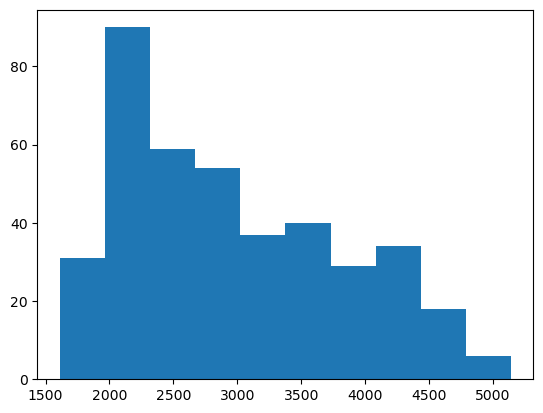

In [704]:
plt.hist(mpg_df.weight)

In [709]:
np.unique(mpg_df.cylinders)

array([3, 4, 5, 6, 8], dtype=int64)

In [712]:
cylinder = mpg_df.groupby('cylinders')['mpg'].mean()

<BarContainer object of 5 artists>

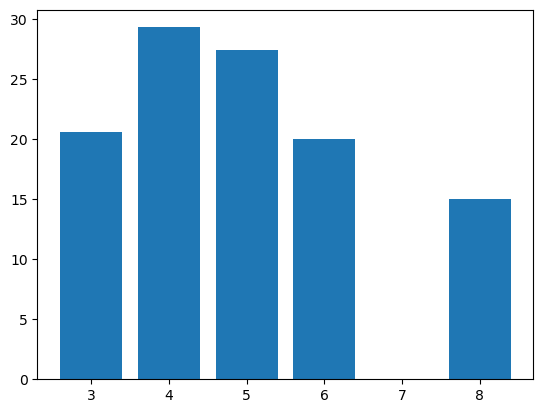

In [714]:
plt.bar(cylinder.index,cylinder.values)

([<matplotlib.patches.Wedge at 0x2d5caa2dd30>,
 [Text(0.9227263212761168, 0.5988122711035945, ''),
  Text(-0.42923889161078854, 1.012795129297501, ''),
  Text(-1.0057216313010162, -0.4455603217671241, ''),
  Text(0.18899516281998494, -1.0836423895504677, ''),
  Text(1.0047812012801292, -0.44767704604330666, '')])

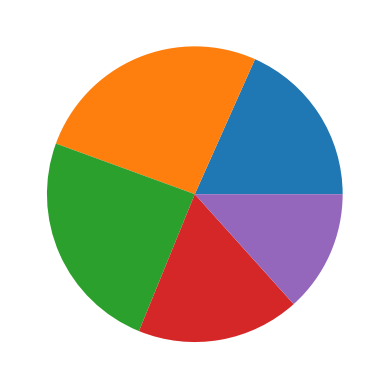

In [718]:
plt.pie(cylinder)

In [719]:
import plotly.express as px

In [720]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day')
fig.show()

In [726]:
fig= px.pie(df, values='tip', names='day')
fig

In [729]:
df.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [730]:
fig = px.pie(df,values='tip',names='smoker')
fig.show

In [734]:
x = np.random.choice([1,2,50],1000,p=[(99/100)*0.5,(99/100)*0.5,1/100])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d5ddcd6e70>,
 'caps': [<matplotlib.lines.Line2D at 0x2d5ddcd74a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d5ddcd6b70>],
 'medians': [<matplotlib.lines.Line2D at 0x2d5ddcd79e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d5ddcd7d10>],
 'means': []}

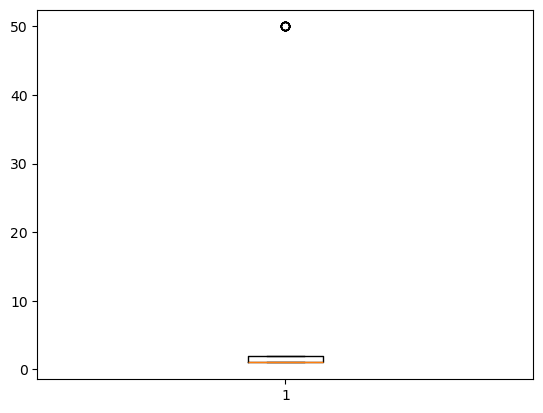

In [735]:
plt.boxplot(x)

In [738]:
x = np.random.randn(1000)

In [739]:
x = np.hstack([x,[10]])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d5ddd7f470>,
 'caps': [<matplotlib.lines.Line2D at 0x2d5ddd7fa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d5ddd7f200>],
 'medians': [<matplotlib.lines.Line2D at 0x2d5ddd7ffe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d5dddac2f0>],
 'means': []}

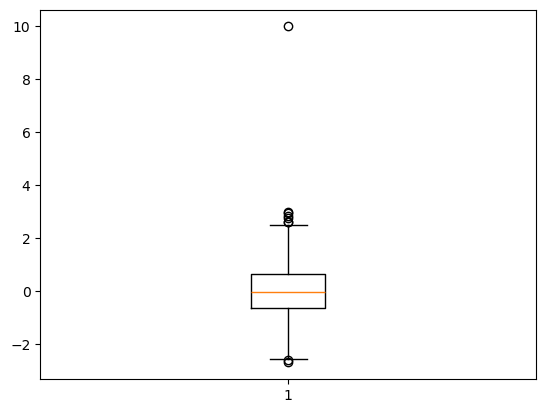

In [740]:
plt.boxplot(x)

In [742]:
df = pd.DataFrame(np.random.randint(30,50,365))

In [744]:
df['date'] = np.datetime64('2023-08-05') + np.arange(365)

In [760]:
d = np.random.choice(df.date,df.date.size,replace=False)
df['d'] = d

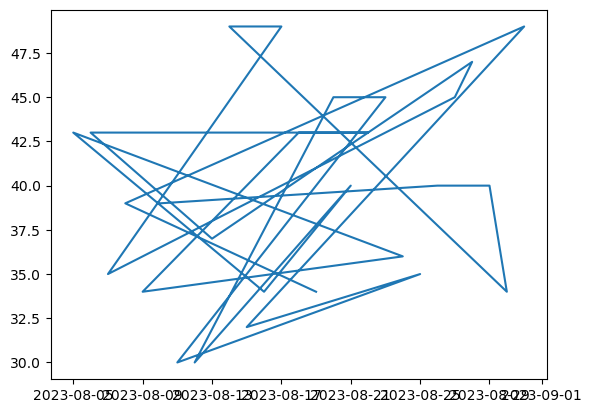

In [761]:
x = df.loc[df.d.astype('str').str.slice(0,7) == '2023-08',:]
plt.plot(x.d,x[0])

In [766]:
titanic.isna().sum()
titanic_raw = titanic.copy()

In [769]:
titanic.drop(columns=['deck'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [776]:
titanic1 = titanic.loc[titanic.loc[~titanic.embark_town.isna(),:].index,:]

In [782]:
titanic.drop(index=titanic.loc[titanic.embark_town.isna(),:].index,inplace=True)

In [786]:
titanic.age[888] = titanic.age.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_4436\3294119360.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [792]:
titanic.age[titanic.loc[titanic.age.isna(),:].index] = titanic.age.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_4436\2745962940.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [794]:
titanic.isna().sum().sum()

0

In [800]:
np.random.seed(100)
subject = ['kor','eng','math','sci']
df = pd.DataFrame(np.random.choice([90,80,70,60,50,np.nan],(100,4)),columns = subject)

In [828]:
type(warnings)

module

In [830]:
import warnings
warnings.filterwarnings(action='ignore')

In [831]:
## 열에 nan 25%이상이면 컬럼을 지우고 (컬럼)
## 행에 nan 2개 이상아면  행을 지우고 (인덱스)
## 나머지 nan 은 각 컬럼의 평균으로 채우기 
## 각 컬럼의 평균을 구하면?
df.columns[df.isna().sum() > df.shape[0]*0.25]
df.loc[df.isna().sum(1) < 2, :].mean()
for col in df.columns:
    df.loc[df[col].isna(),col] = df.loc[:,col].mean()
df.mean()

kor     70.000000
eng     71.095890
math    67.466667
sci     70.649351
dtype: float64

In [814]:
df = df.loc[df.isna().sum(1) < 2, :]

In [833]:
for col in df.columns:
    df.loc[df[col].isna(),col] = df.loc[:,col].mean()

In [820]:
df.isna().sum()

kor     0
eng     0
math    0
sci     0
dtype: int64

In [834]:
data = np.hstack([np.random.randint(1,10,100),np.nan])
df = pd.DataFrame(np.random.choice(data,size=(1000,10)))

In [839]:
df.columns = 'col'+df.columns.astype('str')

In [862]:
# df.col0 = df.col0.fillna(df.col0.mode())
# df.col1 = df.col1.fillna(df.col1.mode())
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

In [864]:
df = pd.DataFrame({
    'c1':['a','a','b','a','b'],
    'c2':[1,1,1,2,2],
    'c3':[1,1,2,2,2]
})

In [874]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [871]:
df.loc[~df.duplicated(),:]

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [875]:
df = pd.DataFrame(np.random.randint(60,101,size=(5,3)))
df['name'] = np.random.choice(['a','b','c'],5)

In [879]:
df.name.duplicated()

0    False
1    False
2     True
3     True
4     True
Name: name, dtype: bool

In [907]:
## 1. normalize (x - x.mean())/x.std()
## 2. minmax (x-x.min())/(x.max()-x.min())
## 3. robust ( x-x.median()/np.percentile(x,75) - np.percentile(x,25))
# 
df = pd.DataFrame()
df['height']  = np.random.randint(160,190,10)
df['weight'] = np.random.randint(40,90,10)

In [886]:
(df.height - df.height.mean())/df.height.std()

0    0.457170
1    0.457170
2   -0.195930
3   -0.359205
4    1.436821
5   -1.828681
6    1.273546
7    0.293895
8   -0.522480
9   -1.012306
Name: height, dtype: float64

In [887]:
(df.weight - df.weight.mean())/df.weight.std()

0    0.405184
1   -0.127953
2   -1.194226
3   -1.514107
4   -0.874344
5    1.364829
6   -0.234580
7   -0.021325
8    1.151575
9    1.044947
Name: weight, dtype: float64

In [899]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [889]:
sc = StandardScaler()

In [891]:
sc.fit(df[['height']])
aa = sc.transform(df[['height']])

In [894]:
mc = MinMaxScaler()
mc.fit(df[['height']])
aa = mc.transform(df[['height']])

In [896]:
bb = (df.height - df.height.min())/(df.height.max()-df.height.min())

In [900]:
rc = RobustScaler()
aa = rc.fit_transform(df[['weight']])

In [901]:
aa

array([[ 0.3       ],
       [-0.03333333],
       [-0.7       ],
       [-0.9       ],
       [-0.5       ],
       [ 0.9       ],
       [-0.1       ],
       [ 0.03333333],
       [ 0.76666667],
       [ 0.7       ]])

In [905]:
bb = (df.weight - df.weight.median())/(np.percentile(df.weight,75)-np.percentile(df.weight,25))

In [906]:
bb

0    0.300000
1   -0.033333
2   -0.700000
3   -0.900000
4   -0.500000
5    0.900000
6   -0.100000
7    0.033333
8    0.766667
9    0.700000
Name: weight, dtype: float64

In [910]:
titanic.age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: age, Length: 889, dtype: float64

Object `np.pcut` not found.


In [913]:
url = "https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv"
mpg_df = pd.read_csv(url)

In [914]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [923]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [934]:
idx = []
for i in range(mpg_df.horsepower.size):
    try:
        float(mpg_df.horsepower[i])
    except:
        idx.append(i)

In [936]:
mpg_df.drop(index=idx,inplace=True)

In [937]:
mpg_df.horsepower = mpg_df.horsepower.astype(np.float_)

In [944]:
count, bin_dividers = np.histogram(mpg_df.horsepower,bins=4)

In [945]:
bin_name = ['저출력','보통출력','고출력']
mpg_df['horse_bin'] = pd.cut(mpg_df.horsepower,
                         bins=bin_dividers,
                         labels=['저출력','보통','고출력','초고출력'],
                         include_lowest=True)

In [947]:
np.unique(mpg_df.horse_bin,return_counts=True)

(array(['고출력', '보통', '저출력', '초고출력'], dtype=object),
 array([ 69, 111, 195,  17], dtype=int64))

In [953]:
data

array([ 7.,  7.,  4.,  4.,  4.,  8.,  3.,  5.,  3.,  8.,  2.,  3.,  9.,
        4.,  3.,  3.,  4.,  3.,  8.,  1.,  7.,  9.,  3.,  2.,  2.,  3.,
        3.,  7.,  3.,  5.,  6.,  2.,  8.,  6.,  5.,  1.,  2.,  6.,  1.,
        2.,  1.,  5.,  4.,  3.,  8.,  7.,  4.,  8.,  3.,  8.,  9.,  6.,
        2.,  7.,  1.,  3.,  6.,  3.,  8.,  2.,  2.,  8.,  9.,  2.,  9.,
        3.,  3.,  1.,  4.,  8.,  5.,  8.,  3.,  1.,  2.,  4.,  5.,  7.,
        6.,  5.,  1.,  6.,  6.,  4.,  1.,  1.,  9.,  7.,  9.,  9.,  7.,
        7.,  2.,  2.,  8.,  9.,  6.,  1.,  9.,  2., nan])

In [993]:
#data = np.hstack([np.linspace(0,3,0.2),np.nan])
df = pd.DataFrame(np.random.choice(data,(30,24)))

In [994]:
df.columns = df.columns.astype('str')+'hour'

In [1010]:
## 0hour에 nan이 있으면 시간대의  평균으로 값을 채움
## 이전시간으로 값을 채움
df.fillna(0,inplace=True)

In [1023]:
len([1,23,'add'])

3

In [1027]:
## 각 날자별로 날자의 전기사용량의  중간값 보나 낮게 쓴 시간 
def find_hour(x):
    return list(df.columns[x.median() < x])
df.apply(find_hour,1)
df.apply(lambda x: list(df.columns[x.median() < x]),1)

0     [0hour, 2hour, 3hour, 6hour, 11hour, 12hour, 1...
1     [1hour, 2hour, 4hour, 5hour, 6hour, 9hour, 11h...
2     [0hour, 4hour, 8hour, 9hour, 15hour, 16hour, 1...
3     [1hour, 2hour, 5hour, 6hour, 7hour, 8hour, 12h...
4     [0hour, 4hour, 5hour, 6hour, 9hour, 13hour, 14...
5     [0hour, 3hour, 5hour, 6hour, 8hour, 10hour, 15...
6     [5hour, 7hour, 9hour, 10hour, 12hour, 13hour, ...
7     [2hour, 3hour, 4hour, 6hour, 11hour, 12hour, 1...
8     [0hour, 4hour, 6hour, 9hour, 11hour, 12hour, 1...
9     [0hour, 2hour, 7hour, 13hour, 14hour, 16hour, ...
10    [1hour, 2hour, 3hour, 7hour, 15hour, 16hour, 1...
11    [3hour, 9hour, 11hour, 12hour, 15hour, 19hour,...
12    [0hour, 1hour, 7hour, 15hour, 16hour, 17hour, ...
13    [0hour, 1hour, 3hour, 6hour, 7hour, 8hour, 11h...
14    [0hour, 3hour, 4hour, 6hour, 8hour, 11hour, 14...
15    [0hour, 1hour, 7hour, 8hour, 14hour, 19hour, 2...
16    [0hour, 2hour, 5hour, 7hour, 8hour, 11hour, 12...
17    [0hour, 5hour, 7hour, 9hour, 10hour, 12hou

In [1037]:
df[df.columns[np.arange(24) % 2 == 1][::-1]]

,23hour,21hour,19hour,17hour,15hour,13hour,11hour,9hour,7hour,5hour,3hour,1hour
0,6.0,9.0,8.0,9.0,2.0,5.0,7.0,2.0,3.0,2.0,7.0,2.0
1,8.0,1.0,9.0,5.0,2.0,9.0,9.0,7.0,4.0,8.0,3.0,6.0
2,1.0,5.0,1.0,8.0,9.0,1.0,3.0,5.0,3.0,2.0,2.0,2.0
3,6.0,9.0,3.0,7.0,7.0,2.0,0.0,4.0,9.0,6.0,4.0,8.0
4,2.0,8.0,8.0,8.0,7.0,9.0,2.0,6.0,3.0,8.0,4.0,3.0
5,8.0,3.0,1.0,5.0,9.0,0.0,2.0,4.0,2.0,8.0,8.0,4.0
6,3.0,2.0,2.0,9.0,6.0,9.0,5.0,9.0,7.0,9.0,1.0,4.0
7,4.0,5.0,6.0,1.0,8.0,2.0,8.0,1.0,4.0,2.0,6.0,3.0
8,5.0,3.0,6.0,3.0,6.0,2.0,5.0,8.0,3.0,2.0,1.0,3.0
9,8.0,7.0,3.0,8.0,0.0,6.0,1.0,2.0,5.0,1.0,2.0,2.0


In [1042]:
titanic.loc[(titanic['class'] == 'Third') | (titanic['class'] == 'second'),:].shape

(491, 14)

In [1045]:
titanic.loc[titanic['class'].isin(['Third','second']),:].shape

(491, 14)

In [1050]:
df1 = pd.DataFrame()
df1['a'] = [ 'a'+str(i) for i in range(4)]
df1['b'] = [ 'b'+str(i) for i in range(4)]
df1['c'] = [ 'c'+str(i) for i in range(4)]
df1.index = [0,1,2,3]

In [1055]:
df2 = pd.DataFrame()
df2['a'] = [ 'a'+str(i) for i in range(2,6)]
df2['b'] = [ 'b'+str(i) for i in range(2,6)]
df2['c'] = [ 'c'+str(i) for i in range(2,6)]
df2['d'] = [ 'd'+str(i) for i in range(2,6)]
df2.index = np.arange(2,6)

In [1062]:
pd.concat([df1,df2,df1,df1,df1],axis=1) # outerjoin

,a,b,c,a,b,c,d,a,b,c,a,b,c,a,b,c
0,a0,b0,c0,NaN,NaN,NaN,NaN,a0,b0,c0,a0,b0,c0,a0,b0,c0
1,a1,b1,c1,NaN,NaN,NaN,NaN,a1,b1,c1,a1,b1,c1,a1,b1,c1
2,a2,b2,c2,a2,b2,c2,d2,a2,b2,c2,a2,b2,c2,a2,b2,c2
3,a3,b3,c3,a3,b3,c3,d3,a3,b3,c3,a3,b3,c3,a3,b3,c3
4,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,a5,b5,c5,d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1069]:
pd.merge(df1,df2,how='right')

,a,b,c,d
0,a2,b2,c2,d2
1,a3,b3,c3,d3
2,a4,b4,c4,d4
3,a5,b5,c5,d5


In [1070]:
df = titanic[['age','sex','class','fare','survived']]

In [1084]:
df.groupby(['class','sex'])[['fare','age']].mean().reset_index()

,class,sex,fare,age
0,First,female,106.693750,33.791074
1,First,male,67.226127,39.277901
2,Second,female,21.970121,28.747160
3,Second,male,19.741782,30.649156
4,Third,female,16.118810,24.051860
5,Third,male,12.661633,27.356705


In [1086]:
## 5개의 지점  a,b,c,d,e 
## sales
np.random.seed(10)
df = pd.DataFrame()
df['date'] = (np.datetime64('2023-01-01') + np.arange(365)).astype('str')
df['location'] = np.random.choice([i for i in 'abcde'], 365)
df['sales'] = np.random.randint(1,30,365)

In [1088]:
df = pd.DataFrame(columns= ['date','location','sales'])
for date in (np.datetime64('2023-01-01') + np.arange(365)):
    for loc in 'abcde':
        sales = np.random.randint(0,30,1)
        tmp_df = pd.DataFrame({'date':date,'location':loc,'sales':sales})
        df = pd.concat([df,tmp_df])

In [1093]:
## 월별 지점별 판매량
df.groupby(df.location)['sales'].sum()

location
a    5138
b    4942
c    5439
d    5221
e    5392
Name: sales, dtype: object

In [1097]:
df.groupby([df.date.astype('str').str.slice(0,7),'location'])['sales'].sum()

date     location
2023-01  a           426
         b           429
         c           369
         d           430
         e           435
2023-02  a           405
         b           466
         c           394
         d           368
         e           428
2023-03  a           452
         b           476
         c           513
         d           469
         e           487
2023-04  a           440
         b           427
         c           510
         d           369
         e           424
2023-05  a           351
         b           312
         c           498
         d           395
         e           577
2023-06  a           433
         b           468
         c           406
         d           397
         e           500
2023-07  a           516
         b           487
         c           384
         d           386
         e           348
2023-08  a           347
         b           455
         c           427
         d           490
       